In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Derivata del flusso al tempo T=2pi

In [2]:
l=0.5
g=0.2

In [3]:
def f(x,t):
    return l*x*(1-x)+g*math.sin(t)

In [4]:
def g_der(x):
    return l-2*l*x

In [5]:
def k(z,x):
    return z*g_der(x)

In [6]:
def RKx(x,t,tau):
    h = (tau/2)*f(x,t)
    x_new = x+tau*f(x+h,t+tau/2)
    t_new = t+tau
    return x_new, t_new
    
def RKz(x,z,t,tau):
    h = (tau/2)*k(z,x)
    #qui do in pasto a k z+h e x perché teoricamente dovrebbe essere t+tau/2 ma è autonomo, in qualsiasi caso
    #questa equazione differenziale dipende da 3 variabili teoricamente, z(t), x(t) e t, non so, e comunque
    #non abbiamo visto che RK è applicabile con 2 var dipendenti dal tempo + il tempo
    z_new = z+tau*k(z+h,x)
    t_new = t+tau
    return z_new, t_new

In [7]:
tau = 1/100
tmax = 2*math.pi
N = int(round(tmax/tau))
z=[]
Ndati = 2000
x0=np.linspace(-0.15,1.85,Ndati)
x=[]
t=[0]

In [8]:
for xp in x0:
    x.append([xp])
    z.append([0.001])
    t=[0]
    for i in range(N):
        x[-1].append(RKx(x[-1][i],t[i],tau)[0])
        a,b = RKz(x[-1][i-1],z[-1][i],t[i],tau)
        z[-1].append(a)
        t.append(b)

In [9]:
z2pi = [item[-1] for item in z]

In [10]:
phi2pi = [item[-1] for item in x]

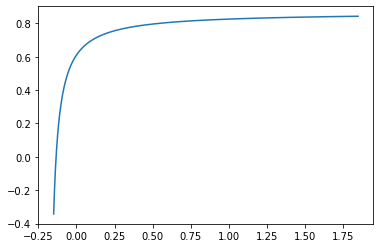

In [11]:
plt.plot(x0, phi2pi)

In [12]:
#metodo 1
phi2pi_der = [item[-1]/item[0] for item in z]

# Confronto derivata calcolata sopra con rapporto incrementale

In [13]:
#metodo 2
phi2pi_der_ri = [(phi2pi[i+1]-phi2pi[i])/0.001 for i in range(1999)]

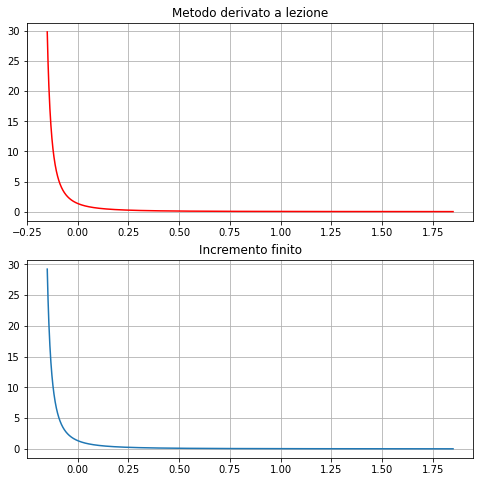

In [14]:
fig, axs = plt.subplots(2, figsize=(8,8))
axs[0].plot(x0,phi2pi_der, 'r')
axs[0].title.set_text('Metodo derivato a lezione')
axs[0].grid()
axs[1].plot(x0[:1999],phi2pi_der_ri)
axs[1].title.set_text('Incremento finito')
axs[1].grid()

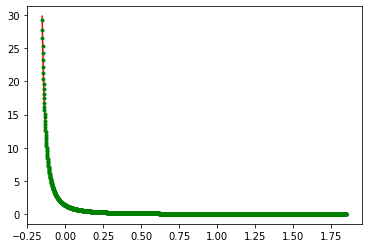

In [15]:
plt.plot(x0,phi2pi_der, 'r')
plt.plot(x0[:1999],phi2pi_der_ri, 'g.')

# Fixed Points Poincaré map with Newton

In [16]:
F = [y-x for x,y in zip(x0,phi2pi)]
Fint = interp1d(x0, F)
Fder = [y-1 for y in phi2pi_der]
Fderint = interp1d(x0, Fder)

In [34]:
zer = []
for xst in x0:
    try:
        for i in range(100):
            xp = xst-(Fint(xst)/Fderint(xst))
            xst = xp
        zer.append(xp)
    except:
        continue
zer = list(set(zer))

In [35]:
zer

[-0.1419972214163065, 0.8177697254331863]

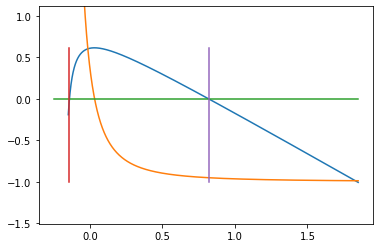

In [36]:
plt.plot(x0,F)
plt.plot(x0,Fder)
plt.plot([-0.25,1.85],[0,0])
plt.ylim(min(F)-0.5, max(F)+0.5)
plt.plot([zer[0],zer[0]], [min(F),max(F)])
plt.plot([zer[1],zer[1]], [min(F),max(F)])
plt.show()

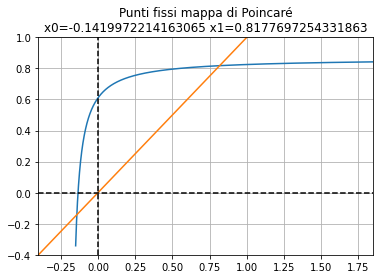

In [52]:
plt.plot(x0,phi2pi)
plt.plot([-0.4,1],[-0.4,1])
plt.plot([-0.4,max(x0)],[0,0], 'k--')
plt.plot([0,0],[-0.4,1], 'k--')
plt.xlim([-0.4,max(x0)])
plt.ylim([-0.4,1])
plt.title('Punti fissi mappa di Poincaré\nx0='+str(zer[0])+' x1='+str(zer[1]))
plt.grid()